In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
print(ess.shape)
ess.head()

(8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess['year'].unique()
# 6 = Year 2012
# 7 = Year 2014

array([6, 7])

In [7]:
ess['idno'].nunique()
# of Unique respondents to this survey

3086

In [8]:
ess['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [35]:
# Combining country and idno catecatories because idno's are reused between countries rather than having a unique # for each individual
cntry_id= []
for i in ess.index:
    country = ess.loc[i, 'cntry']
    idnum = str(int(ess.loc[i, 'idno']))
    co_id = country + '_' + idnum
    cntry_id.append(co_id)
ess['cntry_idno'] = cntry_id
ess['cntry_idno'].head()

0     CH_5
1    CH_25
2    CH_26
3    CH_28
4    CH_29
Name: cntry_idno, dtype: object

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

For each country, trust scores for the same inviduals in 2012 and 2014 will be paired. If individuals aren't present for both years, their data will be discarded.

In [62]:
trust_12 = ess.loc[ess['year'] == 6, ['cntry','cntry_idno','ppltrst']]
trust_14 = ess.loc[ess['year'] == 7, ['cntry_idno','ppltrst']]
trust_df = trust_12.merge(trust_14, on = 'cntry_idno')#.dropna(axis=0)
display(trust_df.head())
trust_df.shape

,cntry,cntry_idno,ppltrst_x,ppltrst_y
0,CH,CH_5,3.0,8.0
1,CH,CH_25,5.0,4.0
2,CH,CH_26,8.0,8.0
3,CH,CH_28,6.0,7.0
4,CH,CH_29,6.0,4.0


(4283, 4)

In [63]:
trust_df.isna().sum()

cntry         0
cntry_idno    0
ppltrst_x     0
ppltrst_y     0
dtype: int64

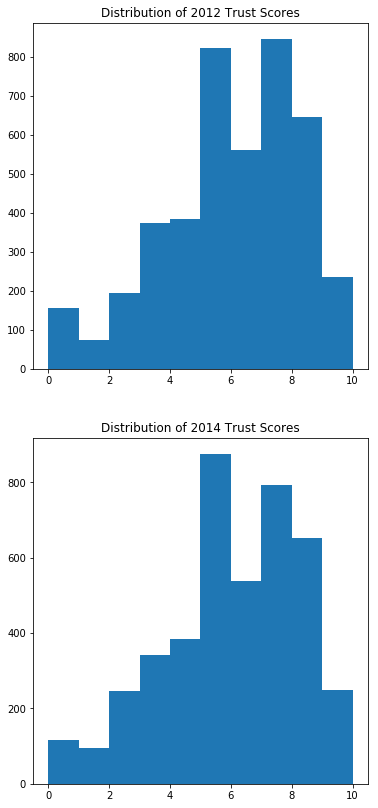

In [40]:
plt.figure(figsize = (6,14))

plt.subplot(2,1,1)
plt.hist(trust_df['ppltrst_x'])
plt.title('Distribution of 2012 Trust Scores')

plt.subplot(2,1,2)
plt.hist(trust_df['ppltrst_y'])
plt.title('Distribution of 2014 Trust Scores')

plt.show()

In [43]:
trust_df.mean(axis=0),

ppltrst_x    5.563098
ppltrst_y    5.556720
dtype: float64

In [64]:
countries = trust_df['cntry'].unique()
paired_ttest_trust = pd.DataFrame(index = countries, columns = ['t_score','pvalue'])

for country in countries:
    A = trust_df.loc[trust_df['cntry'] == country, 'ppltrst_x'] # 2012 Trust Measurements
    B = trust_df.loc[trust_df['cntry'] == country, 'ppltrst_y'] # 2014 Trust MEsaurements
    t_score, pvalue = stats.ttest_rel(B,A, nan_policy = 'omit') # We switch the order in order to get a Final - Intial Measurement
    paired_ttest_trust.loc[country, ['t_score','pvalue']] = [t_score, pvalue]   

paired_ttest_trust

,t_score,pvalue
CH,0.658685,0.510294
CZ,0.500164,0.617129
DE,0.183995,0.856856
ES,-2.45619,0.0141816
NO,-0.507308,0.612093
SE,2.06711,0.0390078


For the pairwise t-tests above, the mean difference in trust for the same individual, meaning that each individual was compared to him or herself between 2012 and 2014. Looking at the results of our paired t_test, it seems that that Spain and Sweden were the only countries to have an actual change in trust. (P-values both less than 0.05; p-values for other countries are much higher than 0.5 meaning the differences are not even questionably significant).

Spain however lost it's trust in other people while trust in people actually increased in Sweden.

--------

A paired t-test was chosen to test this sample because when see how behavior over time changes, it's best to measure the diffences between the same individual overtime then average those differences across individuals. This is opposed to get the average across invididual people over time. Comparing behaviors between the same individual gives a more raw and accurate change in behavior over time.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [68]:
happy_12 = ess.loc[ess['year'] == 6, ['cntry','cntry_idno','happy']]
happy_14 = ess.loc[ess['year'] == 7, ['cntry_idno','happy']]
happy_df = happy_12.merge(happy_14, on = 'cntry_idno')#.dropna(axis=0)
display(happy_df.head())
happy_df.shape

,cntry,cntry_idno,happy_x,happy_y
0,CH,CH_5,8.0,9.0
1,CH,CH_25,9.0,6.0
2,CH,CH_26,7.0,8.0
3,CH,CH_28,10.0,9.0
4,CH,CH_29,8.0,8.0


(4297, 4)

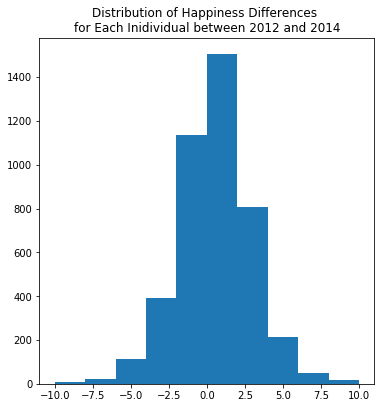

In [88]:
plt.figure(figsize = (6,14))

plt.subplot(2,1,1)
plt.hist(happy_df['happy_x']-happy_df['happy_y'])
plt.title('Distribution of Happiness Differences \nfor Each Inidividual between 2012 and 2014')

plt.show()

In [89]:
countries = happy_df['cntry'].unique()
paired_ttest_happy = pd.DataFrame(index = countries, columns = ['t_score','pvalue'])

for country in countries:
    A = happy_df.loc[happy_df['cntry'] == country, 'happy_x'] # 2012 Happiness Measurements
    B = happy_df.loc[happy_df['cntry'] == country, 'happy_y'] # 2014 Happiness Measurements
    t_score, pvalue = stats.ttest_rel(B,A, nan_policy = 'omit') # We switch the order in order to get a Final - Intial Measurement
    paired_ttest_happy.loc[country, ['t_score','pvalue']] = [t_score, pvalue]   

paired_ttest_happy

,t_score,pvalue
CH,0.319413,0.7495
CZ,1.45614,0.145845
DE,0.806226,0.434614
ES,-1.61383,0.106825
NO,-4.28568,2.06745e-05
SE,0.558164,0.576871


Only one country observed a signifcant change in happiness, and unfortunately the residents of that country became much unhappier. Norway produced a t-score of -4.28568 and p-value of much less than 0.01%, which means happiness is much lower in 2014 than in 2012. All other countries besides Spain showed an increase in happiness but none to extent that produces a p-value below 0.05.

----

Again, we use the paired t-test because we want to compare how residents of each country actually changed in happiness. Aggregating changes in individuals into an overall country average provides a more accurate statistical description of the behavioral changes.

## 3. Who reported watching more TV in 2012, men or women?

In [91]:
tv_df = ess.loc[ess['year'] == 6, ['tvtot', 'gndr']]
male_tv = tv_df.loc[tv_df['gndr'] == 1, 'tvtot'].mean()
female_tv = tv_df.loc[tv_df['gndr'] == 2, 'tvtot'].mean()
print('Avg. Hours of TV on a Weekday: \nMen: {} \nWomen: {}'.format(male_tv, female_tv))

Avg. Hours of TV on a Weekday: 
Men: 3.901906090190609 
Women: 3.944392523364486


Looking at the average across all countries for men and for women, it seems that the amount of time that one gender watches TV on an average weekday in 2012 is similar to the other. However, we will use a t-test to see just how if the difference happens to be statistically significant.

In [93]:
A = tv_df.loc[tv_df['gndr'] == 1, 'tvtot']
B = tv_df.loc[tv_df['gndr'] == 2, 'tvtot']

t_score, pvalue = stats.ttest_ind(B, A, nan_policy = 'omit', equal_var = False)
print('t_score: {} \n pvalue: {}'.format(t_score, pvalue))

t_score: 0.6899351288552367 
 pvalue: 0.4902723647949663


The difference between men and women for average hours of tv watched per weekday is not statistically significant. the pvalue is at nearly 50%, 10x higher than what would be considered a significant difference.

------
We use a normal t-test in this case because samples cannot be paired between the two groups.

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [101]:
A = ess.loc[(ess['year']==6) & (ess['partner']==1), 'pplfair'] # Partnered
B = ess.loc[(ess['year']==6) & (ess['partner']==2), 'pplfair'] # Unpartnered
print('Avg. Rating of Fairness: \nPartnered: {} \nUnpartnered: {}'.format(A.mean(), B.mean()))

Avg. Rating of Fairness: 
Partnered: 6.080736012016523 
Unpartnered: 5.856965174129353


There does seem to be a difference so let's perform a t-test if the difference is significant.

In [102]:
t_score, pvalue = stats.ttest_ind(A, B, nan_policy = 'omit', equal_var = False)
print('t_score: {} \npvalue: {}'.format(t_score, pvalue))

t_score: 3.302788974656336 
 pvalue: 0.000967389776311858


The statistics shows that people who live with their partner are more likely to see others around them as fair. Despite the difference being small, this difference is quite significant, corresponding to a p-value of less than 0.001. A simple t-test was employed because the people in the two groups are independent of each other.

## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

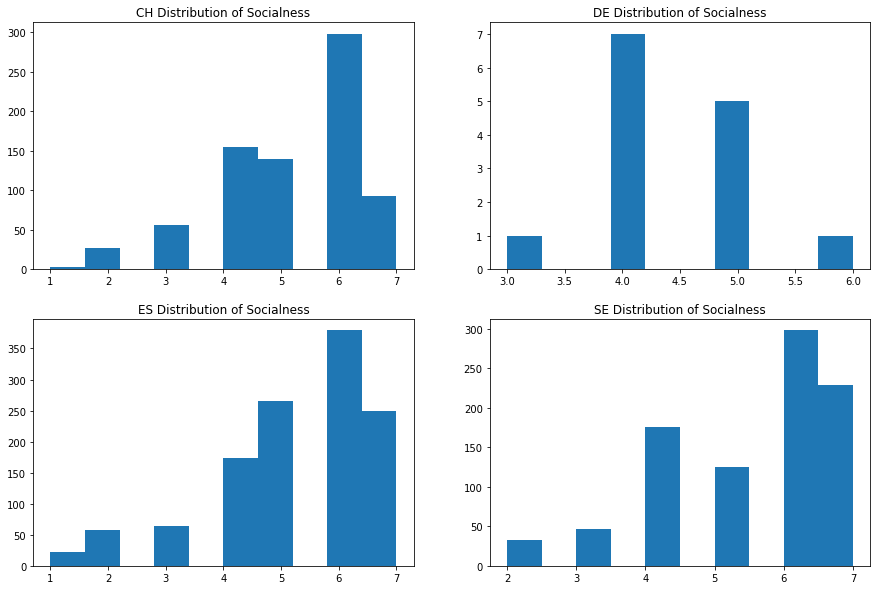

In [121]:
countries = ['CH', 'DE', 'ES', 'SE']
plt.figure(figsize=(15,10))
for i, country in enumerate(countries):
    socialness = ess.loc[(ess['year']==7) & (ess['cntry'] == country), 'sclmeet']
    plt.subplot(2,2,i+1)
    plt.hist(socialness)
    plt.title(country + ' Distribution of Socialness')

Besides Germany, the distributions are slightly left skewed. We will procedd to run standard t-tests then validate them with a median test.

In [116]:
countries = ['CH', 'DE', 'ES', 'SE']
country_pairs = countries.copy()
social_df = pd.DataFrame(columns = ['country_1','country_2','C1 Mean','C2 Mean','Mean Difference (C2-C1) ','t-score', 'pvalue'])

i = 0
for country_1 in countries:
    country_pairs.remove(country_1)
    for country_2 in country_pairs:
        A = ess.loc[(ess['year']==7) & (ess['cntry'] == country_1), 'sclmeet']
        B = ess.loc[(ess['year']==7) & (ess['cntry'] == country_2), 'sclmeet']
        diff_in_means = B.mean() - A.mean()
        t_score, pvalue = stats.ttest_ind(B, A, nan_policy = 'omit', equal_var = False)
        social_df.loc[i] = [country_1, country_2, A.mean(), B.mean(), diff_in_means, t_score, pvalue]
        i += 1

social_df

,country_1,country_2,C1 Mean,C2 Mean,Mean Difference (C2-C1),t-score,pvalue
0,CH,DE,5.160622,4.428571,-0.732050,-3.528859,0.003196
1,CH,ES,5.160622,5.260116,0.099494,1.573721,0.115730
2,CH,SE,5.160622,5.426211,0.265590,4.052908,0.000053
3,DE,ES,4.428571,5.260116,0.831544,4.029057,0.001217
4,DE,SE,4.428571,5.426211,0.997640,4.817058,0.000255
5,ES,SE,5.260116,5.426211,0.166096,2.674926,0.007535


It appears that Sweden, Spain, Switzerland, then Germany are happiest in that order, although the only difference that is not statistically significant are the happiness levels of Spain and Switzerland. Germany stands out as the unhappiest among the group and sweden stands out as the happiest in the group of countries.

Because we used multiple t-test here, we must also employ another statistical test to ensure that there are multiple different types of tests to test evaluate the differences in the group. But also, because the distributions are slightly left-skewed we are running this non-parametric test to see whether it produces the same results on the countries.

In [125]:
A = ess.loc[(ess['year']==7) & (ess['cntry'] == 'CH'), 'sclmeet']
B = ess.loc[(ess['year']==7) & (ess['cntry'] == 'DE'), 'sclmeet']
C = ess.loc[(ess['year']==7) & (ess['cntry'] == 'ES'), 'sclmeet']
D = ess.loc[(ess['year']==7) & (ess['cntry'] == 'SE'), 'sclmeet']
stat, p, med, tbl = stats.median_test(A, B, C, D, nan_policy = 'omit', ties = 'above')

print('Stat: {}\nPvalue: {}\nGrand Median: {}'.format(stat,p,med))
display(tbl)

Stat: 23.25766815620429
Pvalue: 3.5684521897914065e-05
Grand Median: 6.0


array([[391,   1, 629, 527],
       [381,  13, 582, 381]])

The median test does confirm that some or one of the countries are siginficantly different from the rest but it's not a very robust. The best that can be said is that Germanw don't feel as social as the other countries. We will run one more test to see the differences

In [154]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

A = ess.loc[(ess['year']==7) & (ess['cntry'] == 'CH'), 'sclmeet'].dropna().tolist()
B = ess.loc[(ess['year']==7) & (ess['cntry'] == 'DE'), 'sclmeet'].dropna().tolist()
C = ess.loc[(ess['year']==7) & (ess['cntry'] == 'ES'), 'sclmeet'].dropna().tolist()
D = ess.loc[(ess['year']==7) & (ess['cntry'] == 'SE'), 'sclmeet'].dropna().tolist()

data = np.asarray(A+B+C+D)
countries = np.asarray(np.repeat('CH', len(A)).tolist()
                       + np.repeat('DE', len(B)).tolist()
                       + np.repeat('ES', len(C)).tolist()
                       + np.repeat('SE', len(D)).tolist())

tukey = pairwise_tukeyhsd(endog = data,
                         groups = countries,
                         alpha = 0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,DE,-0.7321,0.2092,-1.699,0.2349,False
CH,ES,0.0995,0.4099,-0.0656,0.2646,False
CH,SE,0.2656,0.001,0.0901,0.4411,True
DE,ES,0.8315,0.1188,-0.1323,1.7954,False
DE,SE,0.9976,0.0398,0.032,1.9633,True
ES,SE,0.1661,0.034,0.0087,0.3235,True


From the table above, this graph shows that the only statistically significant conclusion that can be drawn is that Sweden is more social than the rest of the countries. The multiple t-tests returned a figure that represented Germany as much less social than the rest of the countries, but according to Tukey's test, Germany is cannot not be distiguished from Spain and Switzerland. I believe the small sample size for the Germans contributes to this discrepancy. It's a good thing we ran a second test of a different type.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

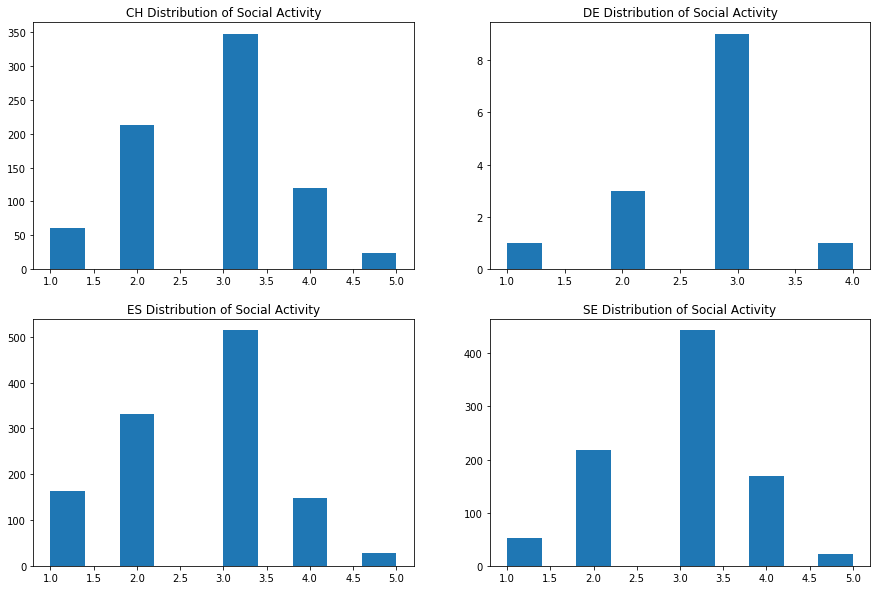

In [156]:
countries = ['CH', 'DE', 'ES', 'SE']
plt.figure(figsize=(15,10))
for i, country in enumerate(countries):
    socialact = ess.loc[(ess['year']==7) & (ess['cntry'] == country), 'sclact']
    plt.subplot(2,2,i+1)
    plt.hist(socialact)
    plt.title(country + ' Distribution of Social Activity')

Great! They're all pretty normally distributed.

In [157]:
countries = ['CH', 'DE', 'ES', 'SE']
country_pairs = countries.copy()
socialact_df = pd.DataFrame(columns = ['country_1','country_2','C1 Mean','C2 Mean','Mean Difference (C2-C1) ','t-score', 'pvalue'])

i = 0
for country_1 in countries:
    country_pairs.remove(country_1)
    for country_2 in country_pairs:
        A = ess.loc[(ess['year']==7) & (ess['cntry'] == country_1), 'sclact']
        B = ess.loc[(ess['year']==7) & (ess['cntry'] == country_2), 'sclact']
        diff_in_means = B.mean() - A.mean()
        t_score, pvalue = stats.ttest_ind(B, A, nan_policy = 'omit', equal_var = False)
        socialact_df.loc[i] = [country_1, country_2, A.mean(), B.mean(), diff_in_means, t_score, pvalue]
        i += 1

socialact_df

,country_1,country_2,C1 Mean,C2 Mean,Mean Difference (C2-C1),t-score,pvalue
0,CH,DE,2.781699,2.714286,-0.067414,-0.342392,7.372287e-01
1,CH,ES,2.781699,2.616878,-0.164822,-3.825761,1.351363e-04
2,CH,SE,2.781699,2.879425,0.097725,2.236272,2.547250e-02
3,DE,ES,2.714286,2.616878,-0.097408,-0.496802,6.273005e-01
4,DE,SE,2.714286,2.879425,0.165139,0.841657,4.145641e-01
5,ES,SE,2.616878,2.879425,0.262547,6.589385,5.612167e-11


Sweden participates in more social activities than Switzerland, Switzerland more than Germany, and Germany more than Spain. However, all of p-values involving Germany do show the difference between it's own level of social activity and that of other countries is statistically significant. This is due to it's small sample size. Let's run Tukey's just to cross validate.

In [158]:
A = ess.loc[(ess['year']==7) & (ess['cntry'] == 'CH'), 'sclact'].dropna().tolist()
B = ess.loc[(ess['year']==7) & (ess['cntry'] == 'DE'), 'sclact'].dropna().tolist()
C = ess.loc[(ess['year']==7) & (ess['cntry'] == 'ES'), 'sclact'].dropna().tolist()
D = ess.loc[(ess['year']==7) & (ess['cntry'] == 'SE'), 'sclact'].dropna().tolist()

data = np.asarray(A+B+C+D)
countries = np.asarray(np.repeat('CH', len(A)).tolist()
                       + np.repeat('DE', len(B)).tolist()
                       + np.repeat('ES', len(C)).tolist()
                       + np.repeat('SE', len(D)).tolist())

tukey = pairwise_tukeyhsd(endog = data,
                         groups = countries,
                         alpha = 0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,DE,-0.0674,0.9,-0.7006,0.5658,False
CH,ES,-0.1648,0.001,-0.2737,-0.0559,True
CH,SE,0.0977,0.1294,-0.0176,0.2131,False
DE,ES,-0.0974,0.9,-0.7286,0.5338,False
DE,SE,0.1651,0.9,-0.4672,0.7975,False
ES,SE,0.2625,0.001,0.1589,0.3662,True


Naturally, all tests involving Germany produced insiginificant differences. However, according to the Tukey test, Switzerland and Spain don't have a significant difference in social activity. It's a good thing we checked with this second test.

----
For the last two questions, we used multiple t-tests pairing each country and finally Tukey's Honest Siginificant Differences test. The groups are independent of each other, but it was necessary to run a second kind of test to catch any false positive significances from original t-tests which we did in both cases.